This code implements the Euler method to approximate the solutions to the given differential equations in 2D. It computes the trajectory of the system and plots the xy values.

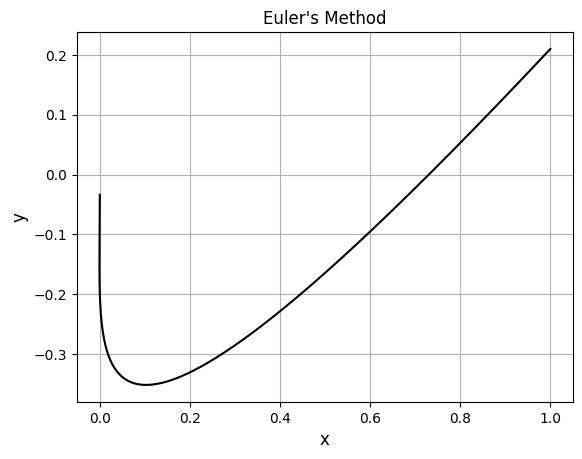

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# For values of y>1, a small time step needs to be used (cubic nonlinearity)
dt = 0.0001  # Time step
T = 3.15  # Final time
tsteps = np.ceil(T/dt).astype(int)  # Number of steps

# Initial condition
x0 = 1
y0 = 0.21

time = 0
xn = x0
yn = y0

# Save the discrete time and solution values
tdata = [time]
xdata = [x0]
ydata = [y0]

# The Euler method
for n in range(1, tsteps + 1):
    fnx = yn**3 - 4*xn
    fny = yn**3 - yn - 3*xn

    xn = xn + dt*fnx
    yn = yn + dt*fny

    time = dt*n

    # Save data
    tdata.append(time)
    xdata.append(xn)
    ydata.append(yn)

plt.plot(xdata, ydata, 'k')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Euler\'s Method')
plt.grid(True)
plt.show()


This code will generate a 2x2 subplot with each subplot showing the solution of the respective numerical method along with a single plot where the solutions of Euler's Method, Modified Euler's Method, 4th Order Runge-Kutta, and Scipy's solve_ivp are superimposed.





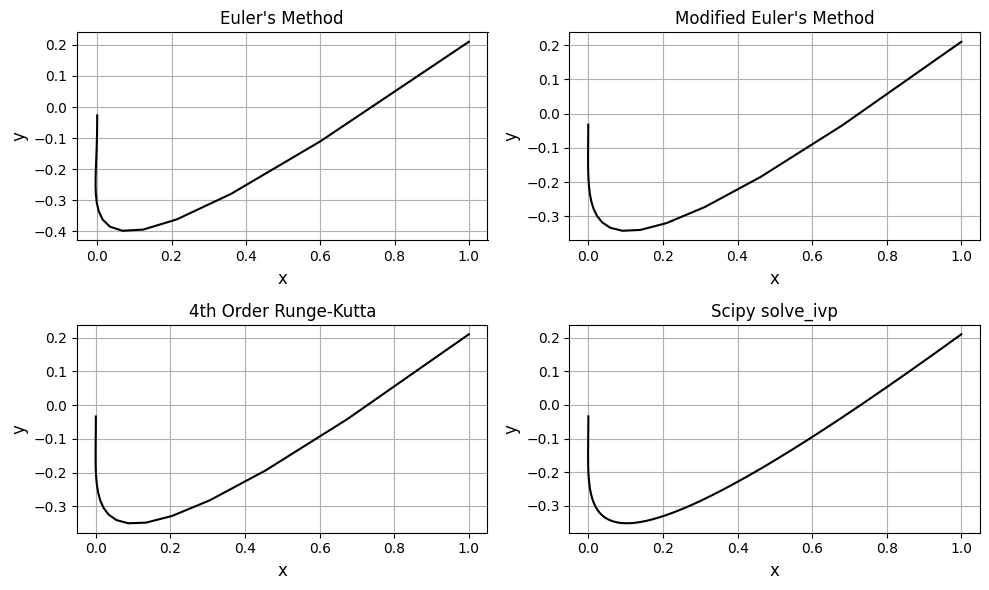

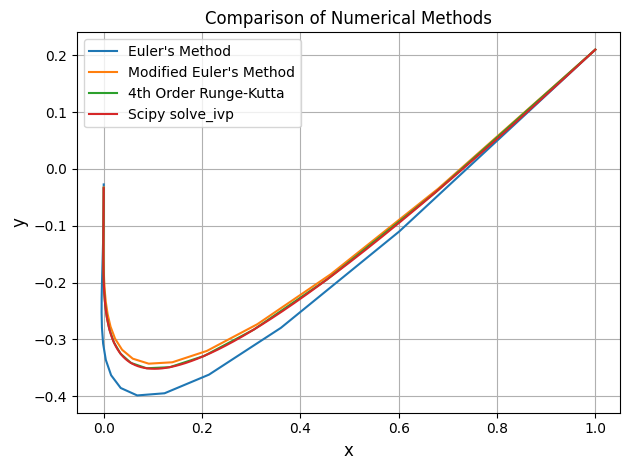

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of differential equations
def f(t, y):
    x, y = y
    return [y**3 - 4*x, y**3 - y - 3*x]

# For values of y > 1, a small time step needs to be used (cubic nonlinearity)
dt = 0.1  # Time step
T = 3.15  # Final time
tsteps = np.ceil(T/dt).astype(int)  # Number of steps

# Initial condition
x0 = 1
y0 = 0.21

# Euler's Method
time = 0
xn = x0
yn = y0

t_euler = [time]
x_euler = [x0]
y_euler = [y0]

for n in range(1, tsteps + 1):
    fnx = yn**3 - 4*xn
    fny = yn**3 - yn - 3*xn

    xn = xn + dt*fnx
    yn = yn + dt*fny

    time = dt*n

    # Save data
    t_euler.append(time)
    x_euler.append(xn)
    y_euler.append(yn)

# Modified Euler's Method
time = 0
xn = x0
yn = y0

t_modified_euler = [time]
x_modified_euler = [x0]
y_modified_euler = [y0]

for n in range(1, tsteps + 1):
    fnx = yn**3 - 4*xn
    fny = yn**3 - yn - 3*xn

    xn_star = xn + dt*fnx
    yn_star = yn + dt*fny

    xn = xn + dt*0.5*(fnx + (yn_star**3 - 4*xn_star))
    yn = yn + dt*0.5*(fny + (yn_star**3 - yn_star - 3*xn_star))

    time = dt*n

    # Save data
    t_modified_euler.append(time)
    x_modified_euler.append(xn)
    y_modified_euler.append(yn)

# 4th Order Runge-Kutta
t_runge_kutta = np.linspace(0, T, tsteps + 1)
sol_runge_kutta = solve_ivp(f, [0, T], [x0, y0], t_eval=t_runge_kutta)

# Scipy's solve_ivp
sol_scipy = solve_ivp(f, [0, T], [x0, y0], dense_output=True)
t_scipy = np.linspace(0, T, 1000)
sol_interp = sol_scipy.sol(t_scipy)

# Plot the solutions
plt.figure(figsize=(10, 6))

# Euler's Method
plt.subplot(2, 2, 1)
plt.plot(x_euler, y_euler, 'k')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Euler\'s Method')
plt.grid(True)

# Modified Euler's Method
plt.subplot(2, 2, 2)
plt.plot(x_modified_euler, y_modified_euler, 'k')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Modified Euler\'s Method')
plt.grid(True)

# 4th Order Runge-Kutta
plt.subplot(2, 2, 3)
plt.plot(sol_runge_kutta.y[0], sol_runge_kutta.y[1], 'k')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('4th Order Runge-Kutta')
plt.grid(True)

# Scipy's solve_ivp
plt.subplot(2, 2, 4)
plt.plot(sol_interp[0], sol_interp[1], 'k')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Scipy solve_ivp')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the solutions
plt.plot(x_euler, y_euler, label="Euler's Method")
plt.plot(x_modified_euler, y_modified_euler, label="Modified Euler's Method")
plt.plot(sol_runge_kutta.y[0], sol_runge_kutta.y[1], label="4th Order Runge-Kutta")
plt.plot(sol_interp[0], sol_interp[1], label="Scipy solve_ivp")
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Comparison of Numerical Methods')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Remark:**

You will notice a difference between the numerical methods when the solution to the differential equation exhibits significant nonlinear behavior or when the step size is relatively large.

As seen the the previous lessons (DS1), the Euler's method is the simplest and least accurate among the three methods. It may produce noticeable deviations from the exact solution for certain systems or when the step size is large. The Improved Euler's method provides better accuracy by incorporating a midpoint approximation, resulting in a more accurate estimation of the solution. The 4th Order Runge-Kutta method is the most accurate among the three, providing even better approximations by considering multiple intermediate steps.

To observe less difference, you can try adjusting the step size, e.g. dt = 0.0001, in the code and compare the results. As you decrease the step size, the accuracy of the numerical methods improves, and the solutions will approach the exact solution more closely.

The next code simply plot the phase portrait and the vector field for a given 2D ordinary differential equation

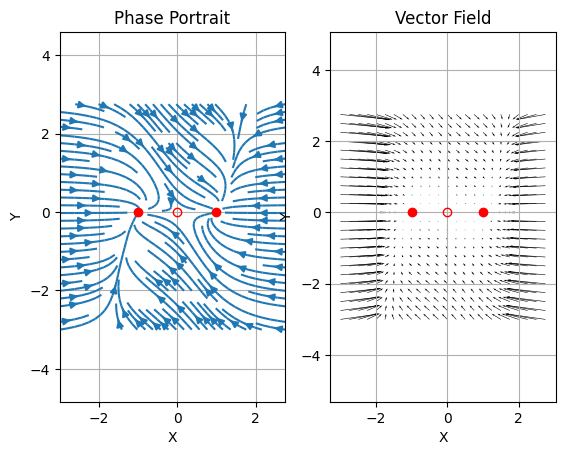

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x and y values
x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)

# Define the vector field
Xdot = Y + X - X**3
Ydot = -Y

# Plot the phase portrait
plt.figure(1)
plt.subplot(1, 2, 1)
plt.streamplot(X, Y, Xdot, Ydot)
plt.axis('equal')
plt.grid(True)
plt.plot(-1, 0, 'or', markersize=6)
plt.plot(1, 0, 'or', markersize=6)
plt.plot(0, 0, 'or', markersize=6, fillstyle='none')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Phase Portrait')

# Plot the vector field
plt.subplot(1, 2, 2)
plt.quiver(X, Y, Xdot, Ydot, scale=120, linewidth=0.5)
plt.axis('equal')
plt.grid(True)
plt.plot(-1, 0, 'or', markersize=6)
plt.plot(1, 0, 'or', markersize=6)
plt.plot(0, 0, 'or', markersize=6, fillstyle='none')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Field')

plt.show()
